### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### A) use describe(),index(),info() and value_counts()

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.drop('PassengerId',axis=1,inplace=True)

In [14]:
df.drop('Name',axis=1,inplace=True)

In [15]:
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S


In [16]:
df.tail(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,3,male,NaN,0,0,359309,8.0500,NaN,S
417,3,male,NaN,1,1,2668,22.3583,NaN,C


In [18]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [19]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [22]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

#### B)Use sns.pairplot(), sns.heatmap() for visualization

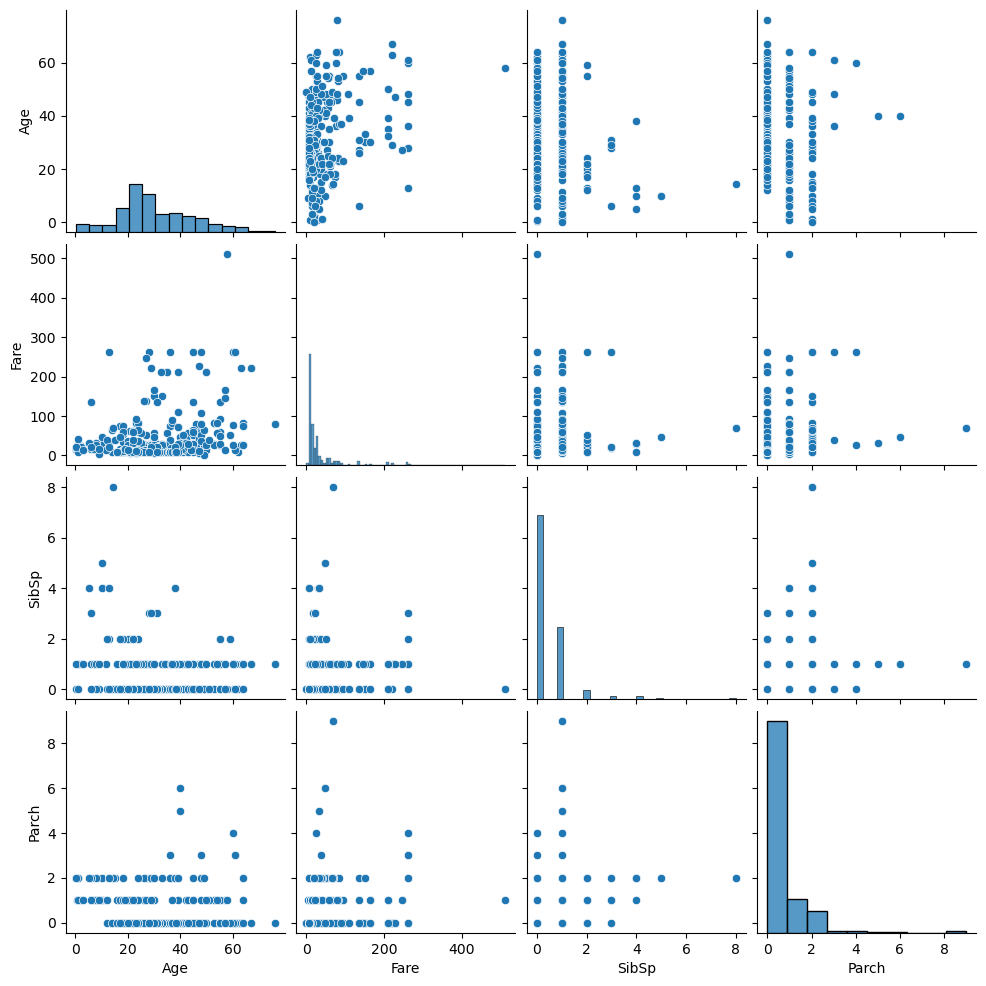

In [24]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

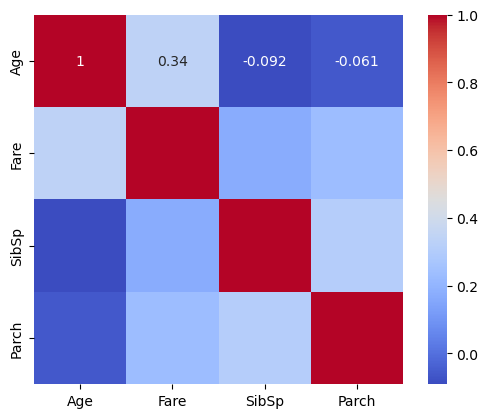

In [26]:
corr_matrix = df[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

#### C) Identify relationships and trends

In [34]:
df.corr()

C:\Users\yamin\AppData\Local\Temp\ipykernel_26192\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [44]:
def cont_vis_analysis(df,col):
    fig,axes=plt.subplots(1,3,figsize=(10,4),layout='constrained')
    fig.suptitle('Continous Data Distribution')
    
    axes[0].set_title('Histogram')
    sns.histplot(df[col],ax=axes[0])
    
    axes[1].set_title('KDE plot')
    sns.kdeplot(df[col],ax=axes[1])
    
    axes[2].set_title('Box plot')
    sns.boxplot(df[col],ax=axes[2])
    
    plt.show()

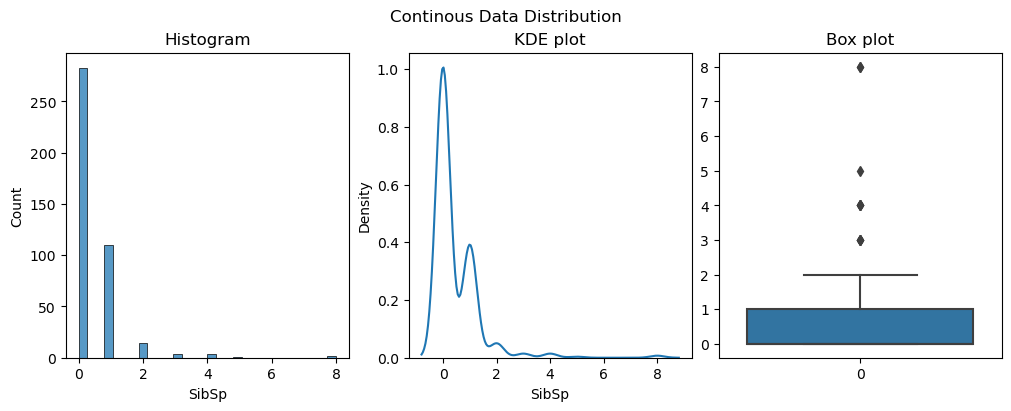

In [45]:
cont_vis_analysis(df,'SibSp')

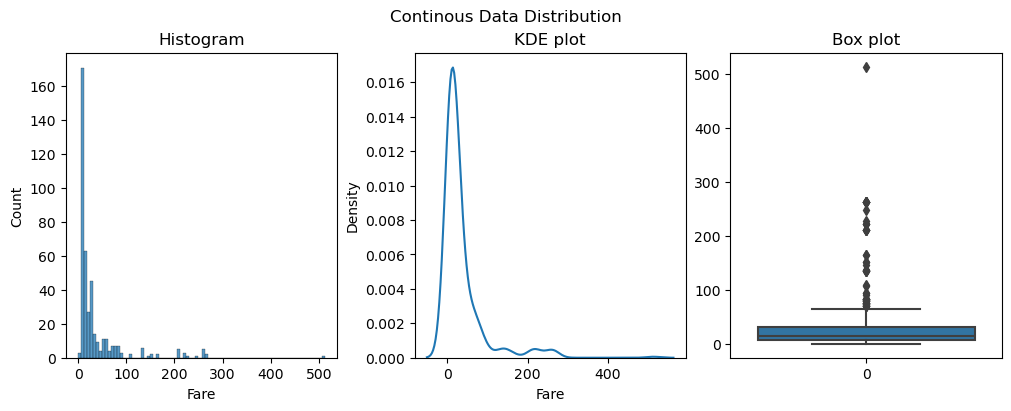

In [46]:
cont_vis_analysis(df,'Fare')

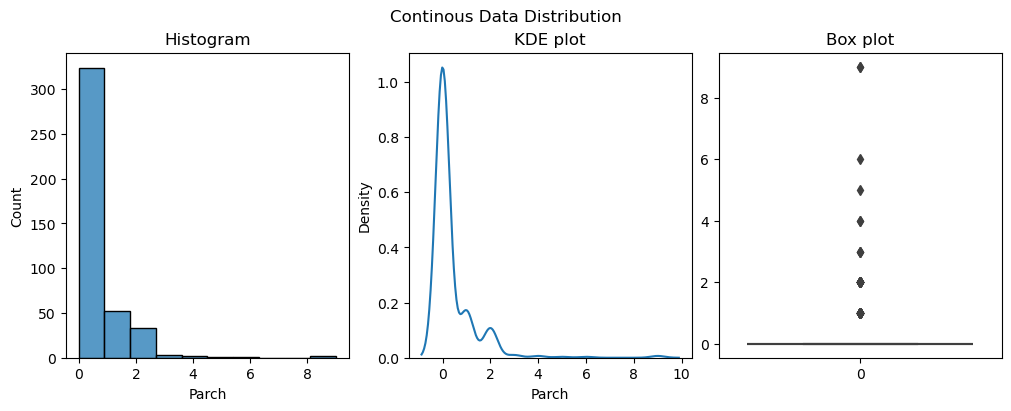

In [47]:
cont_vis_analysis(df,'Parch')

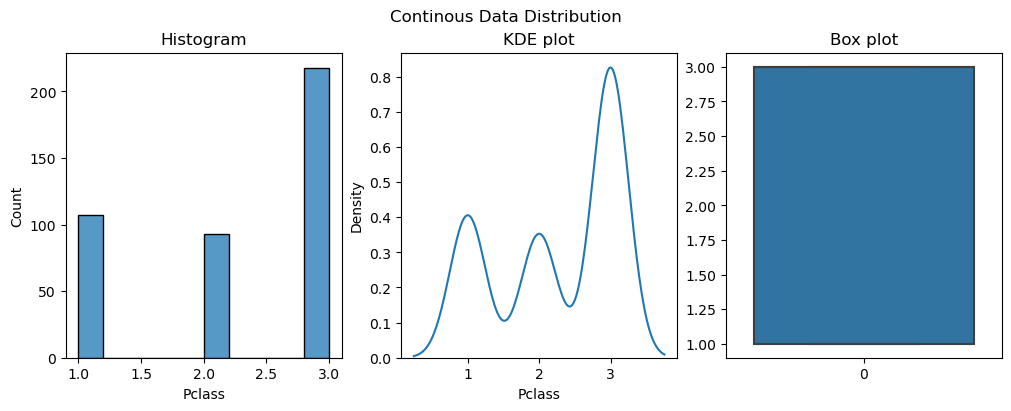

In [49]:
cont_vis_analysis(df,'Pclass')

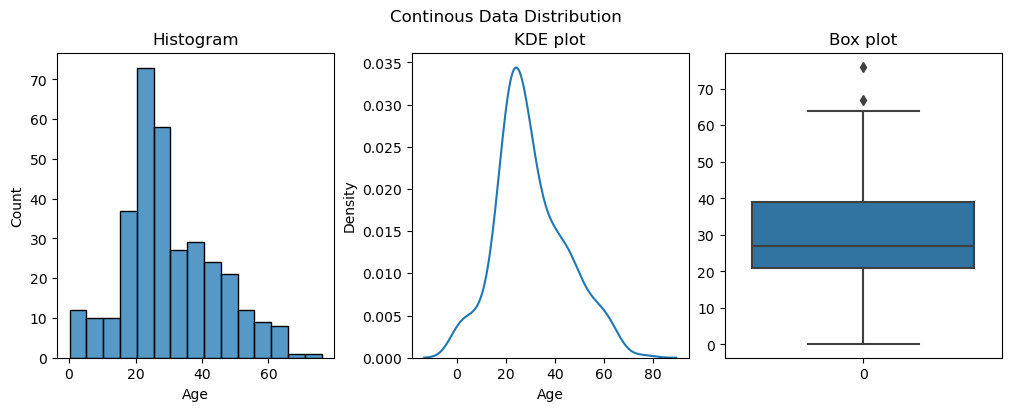

In [48]:
cont_vis_analysis(df,'Age')

#### D)Plot histograms, boxplots, scatterplots

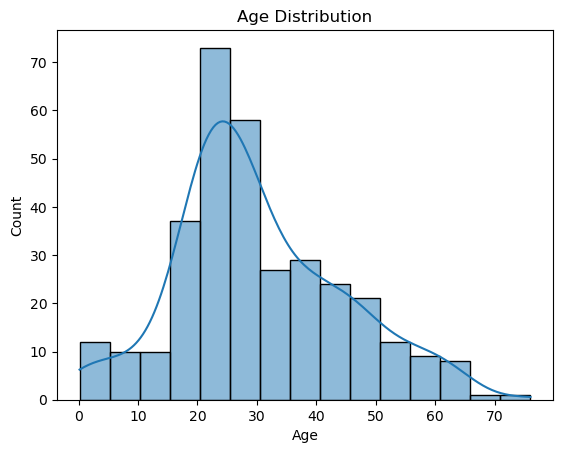

In [29]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

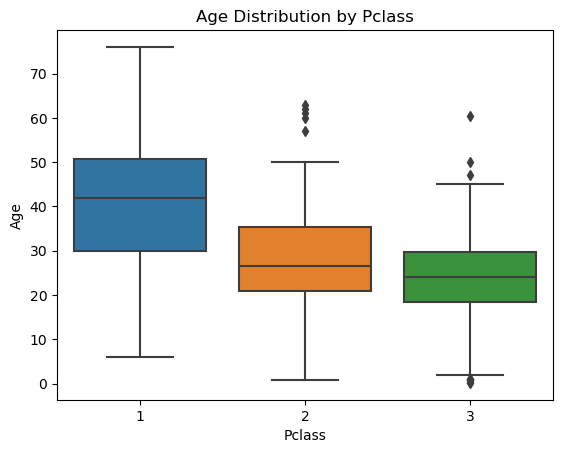

In [30]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

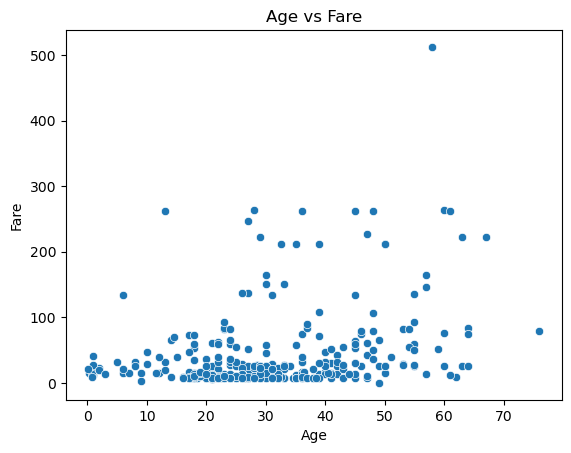

In [31]:
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.show()

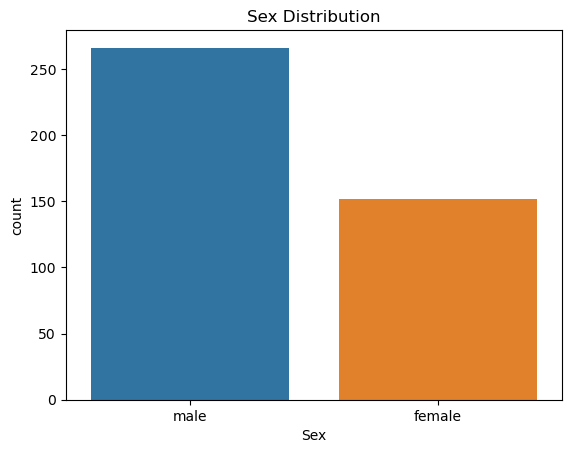

In [32]:
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()

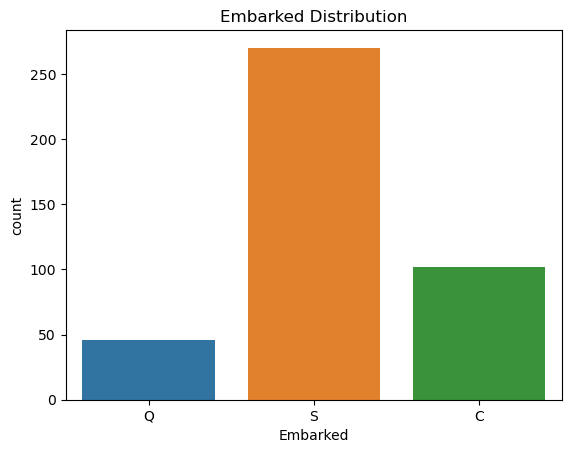

In [33]:
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.show()

#### e. Write observations for each visual

###### Age Distribution: The age distribution is slightly skewed to the right, with most passengers between 20-40 years old.
###### Age Distribution by Pclass: The age distribution varies by Pclass, with Pclass 1 having older passengers and Pclass 3 having younger passengers.
###### Age vs Fare: There is a weak positive correlation between Age and Fare.
###### Sex Distribution: There are more male passengers than female passengers.
###### Embarked Distribution: Most passengers embarked from S (Southampton).

#### f. Provide summary of findings

###### The Titanic dataset has 418 non-null rows and 11 columns.
###### The dataset has a mix of numerical and categorical variables.
###### The age distribution is slightly skewed to the right.
###### There is a weak positive correlation between Age and Fare.
###### The sex distribution is imbalanced, with more male passengers.
###### The embarked distribution is imbalanced, with most passengers embarking from S (Southampton).